## Task 1 (Video Reading + Quick Exploring)
<or> 
    <li>Import Libraries</li>
    <li>Display Video</li>
    <li>Video Metadata</li>
    <li>Displaying Multiple Frames From the video</li>
</or>


#### Import Libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import Video

#### Display Video

In [16]:
# Specify the path to your video file
video_path = 'test.mp4'

# Display the video
Video(video_path ,width=600, height=300)

#### Video Metadata
<or>
    <li>Number of Frames </li>
    <li>Frame Width</li>
    <li>Frame Height</li>
    <li>Frames Per Second (fps)</li>
    <li>Displaying a Video Contaning Frame Counter</li>
</or>

In [4]:
cap = cv2.VideoCapture(video_path)

In [5]:
# Number of Frames
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(f"Total Number of Frames is: {num_frames}")

Total Number of Frames is: 9940.0


In [6]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 1012.0, Width 1920.0


In [7]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 59.94


In [8]:
cap.release()

In [9]:
#Display Frame number on the video
cap = cv2.VideoCapture(video_path)

# Define the desired width and height
new_width, new_height = 700, 480

# Initialize frame counter
frame_counter = 0

# Define the font color (black in BGR format)
font_color = (0, 0, 0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Resize the frame to the desired width and height
    frame = cv2.resize(frame, (new_width, new_height))

    # Increment the frame counter
    frame_counter += 1

    # Display the frame counter on the frame using black font
    cv2.putText(frame, f'Frame: {frame_counter}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, font_color, 2)

    # Display the resized frame
    cv2.imshow('Resized Video', frame)

    # Break the loop if 'q' key is pressed or the window is closed
    if cv2.waitKey(25) & 0xFF == ord('q') or cv2.getWindowProperty('Resized Video', cv2.WND_PROP_VISIBLE) < 1:
        break

cap.release()
cv2.destroyAllWindows()



#### Displaying Multiple Frames From the video

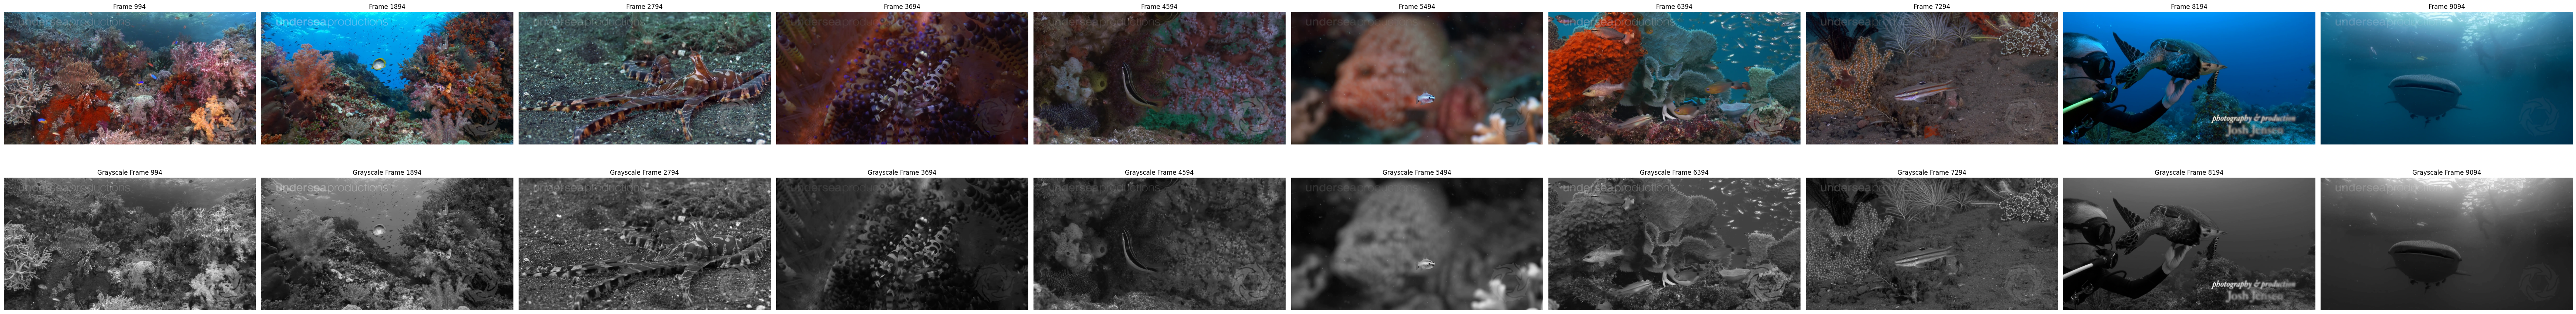

In [10]:
cap = cv2.VideoCapture(video_path)

frames_to_display = [int(frame_number) for frame_number in list(range(994, 9940, 900))]


fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(70, 10))

for i, frame_number in enumerate(frames_to_display):
    # Read the frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the original frame on the right side
    axes[0, i].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Frame {frame_number}')

    # Display the grayscale frame on the left side
    axes[1, i].imshow(gray_frame, cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Grayscale Frame {frame_number}')

plt.tight_layout()
plt.savefig('video_frames_plot.png')
plt.show()

cap.release()
